In [ ]:
label_mapping = {

    'Angle_C_Au_I': r'$\theta_{\mathrm{C-Au-I}}$',
    'Bond_Au_C': r'$d_{\mathrm{Au-C}}$',
    'Bond_Au_I': r'$d_{\mathrm{Au-I}}$',
    'Bond_C_I': r'$d_{\mathrm{C-I}}$',
    'Bond_Au_Au': r'$d_{\mathrm{Au-Au}}$',
    'Farthest_Distance': r'$d_{\mathrm{max}}$',
    'Mol_Size_Short': r'$L_{\mathrm{short}}$',
    'AtomNum': r'$N_{\mathrm{atoms}}$',
    'Volume': r'$V_{\mathrm{mol}}$',
    'Density': r'$\rho$',
    'SDP': r'$SDP$',

    'c_CM5_Au1': r'$q_{\mathrm{Au1}}^{\mathrm{CM5}}$',
    'c_CM5_Au2': r'$q_{\mathrm{Au2}}^{\mathrm{CM5}}$',
    'c_CM5_C': r'$q_{\mathrm{C}}^{\mathrm{CM5}}$',
    'c_CM5_I': r'$q_{\mathrm{I}}^{\mathrm{CM5}}$',
    'c_CM5_P1': r'$q_{\mathrm{P1}}^{\mathrm{CM5}}$',
    'c_CM5_P2': r'$q_{\mathrm{P2}}^{\mathrm{CM5}}$',
    
    'c_Mulli_Au2': r'$q_{\mathrm{Au2}}^{\mathrm{Mul(xTB)}}$',
    'c_Mulli_C': r'$q_{\mathrm{C}}^{\mathrm{Mul(xTB)}}$',
    'c_Mulli_I': r'$q_{\mathrm{I}}^{\mathrm{Mul(xTB)}}$',
    'c_Mulli_P1': r'$q_{\mathrm{P1}}^{\mathrm{Mul(xTB)}}$',
    'c_Mulli_P2': r'$q_{\mathrm{P2}}^{\mathrm{Mul(xTB)}}$',
    
    'Mulliken_pop_Au_2': r'$q_{\mathrm{Au2}}^{\mathrm{Mul}}$',
    'Mulliken_pop_C': r'$q_{\mathrm{C}}^{\mathrm{Mul}}$',
    'Mulliken_pop_I': r'$q_{\mathrm{I}}^{\mathrm{Mul}}$',
    'Mulliken_pop_P_1': r'$q_{\mathrm{P1}}^{\mathrm{Mul}}$',
    'Mulliken_pop_P_2': r'$q_{\mathrm{P2}}^{\mathrm{Mul}}$',
    
    'Hirshfeld_c_C': r'$q_{\mathrm{C}}^{\mathrm{Hir}}$',
    'Hirshfeld_c_P_1': r'$q_{\mathrm{P1}}^{\mathrm{Hir}}$',
    'Hirshfeld_c_P_2': r'$q_{\mathrm{P2}}^{\mathrm{Hir}}$',
    
    'EA': r'$EA$',
    'LEA_Ave': r'$\overline{LEA}$',

    'Hirshfeld_ob_l_C': r'$w_{\mathrm{LUMO, C}}^{\mathrm{Hir}}$', 
    'Hirshfeld_ob_l_I': r'$w_{\mathrm{LUMO, I}}^{\mathrm{Hir}}$',
    'l_shell_d': r'$w_{d}^{\mathrm{LUMO}}$', 
    'Pop_type_d_I': r'$n_{d}^{\mathrm{I}}$',
    'Pop_type_p_C': r'$n_{p}^{\mathrm{C}}$',
    'Pop_type_p_I': r'$n_{p}^{\mathrm{I}}$',
    'Pop_type_s_I': r'$n_{s}^{\mathrm{I}}$',


    'Atom_d_m_Z_Au_1': r'$\mu_{z}^{\mathrm{Au1}}$',
    'Atom_d_m_X_Au_1': r'$\mu_{x}^{\mathrm{Au1}}$',
    'Atom_d_m_Z_I': r'$\mu_{z}^{\mathrm{I}}$',
    'Atom_d_m_C': r'$\mu_{\mathrm{C}}$',
    'd_m_X': r'$\mu_{x}^{\mathrm{mol}}$', 

    'bv_P_1': r'$V_{\mathrm{bur}}^{\mathrm{P1}}$',
    'bv_P_2': r'$V_{\mathrm{bur}}^{\mathrm{P2}}$',
    'sasa_P_1': r'$SASA_{\mathrm{P1}}$',
    'sasa_P_2': r'$SASA_{\mathrm{P2}}$',
    'disp_volume': r'$V_{\mathrm{disp}}$',
    'pyr_p_Au_1': r'$\tau_{\mathrm{pyr}}^{\mathrm{Au1}}$',
    'pyr_P_angle_Au_1': r'$\theta_{\mathrm{pyr}}^{\mathrm{Au1}}$'
}

⚠️ Warning: Found 11 problematic feature columns that need to be removed.
  - 2 columns contain NaN values: ['Mayer_Bo', 'Atom_connec']
  - 9 columns are constant: ['IP_shift', 'EA_shift', 'h_shell_f', 'l_shell_f', 'Pop_type_f_Au_1', 'Pop_type_f_Au_2', 'Pop_type_d_C', 'Pop_type_f_C', 'Pop_type_f_I']
 Number of features strongly correlated with Top 10: 21


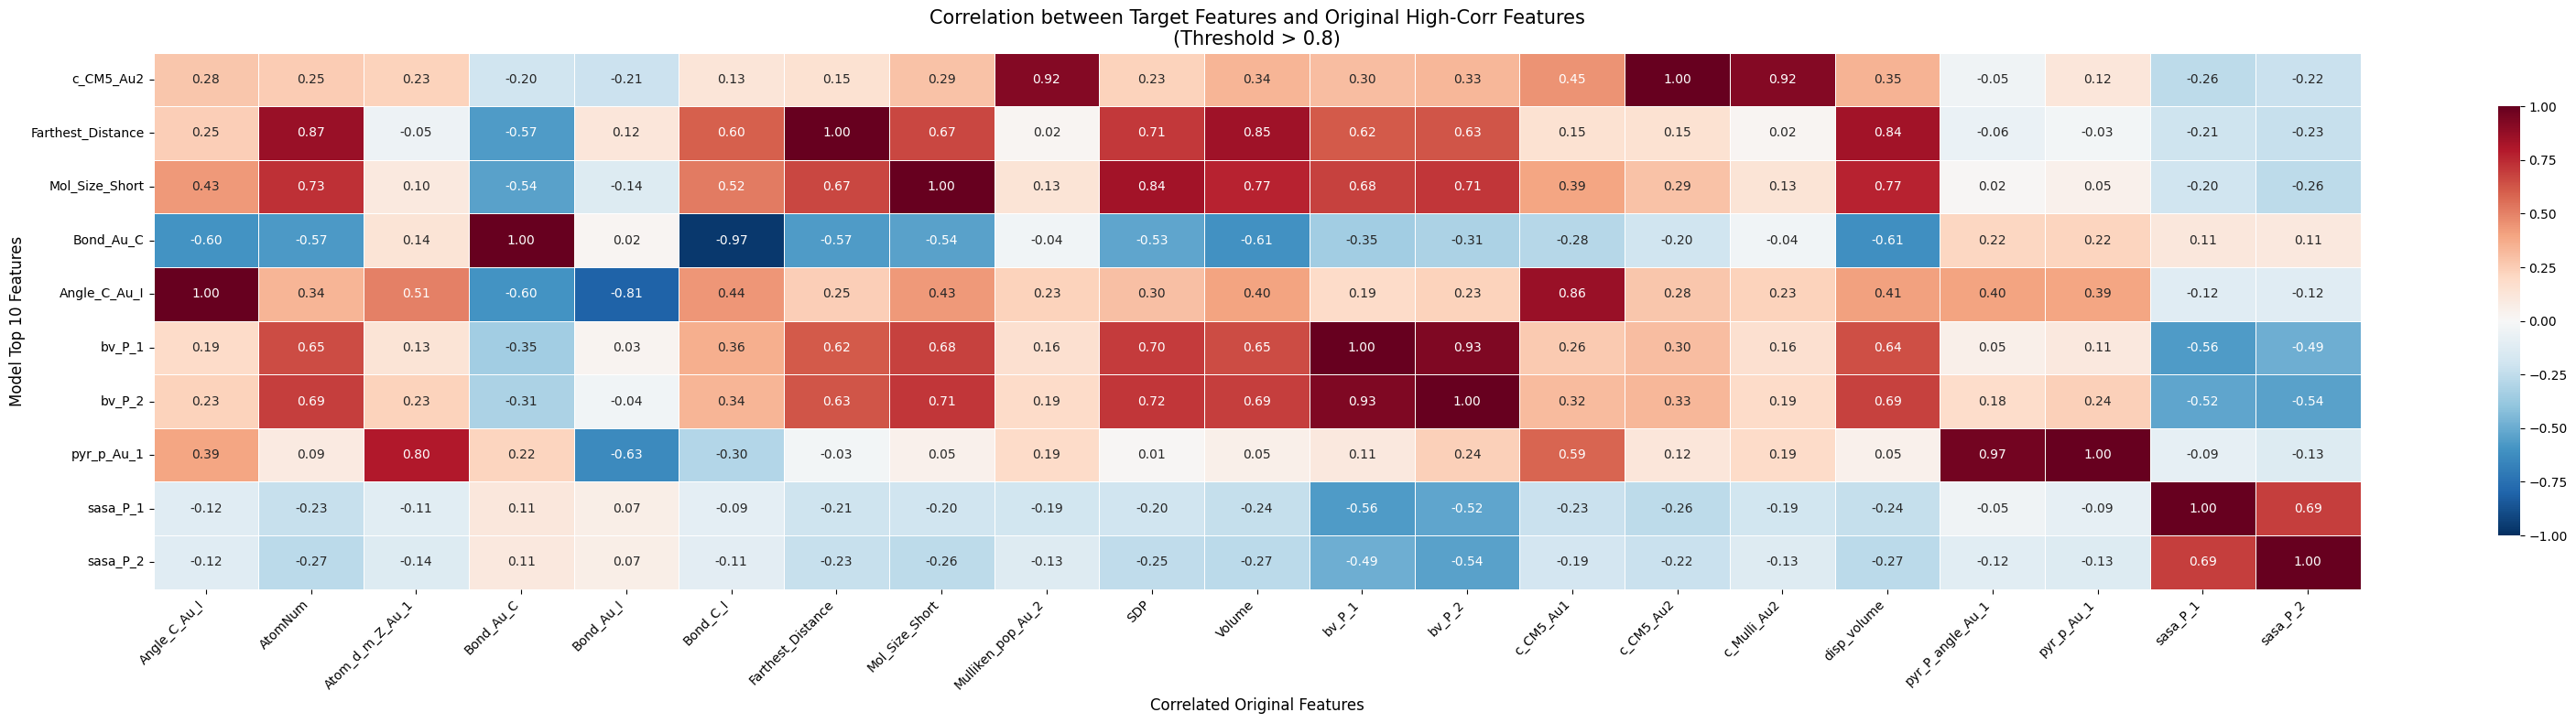

Start plotting: 10 source features -> 11 highly correlated target features


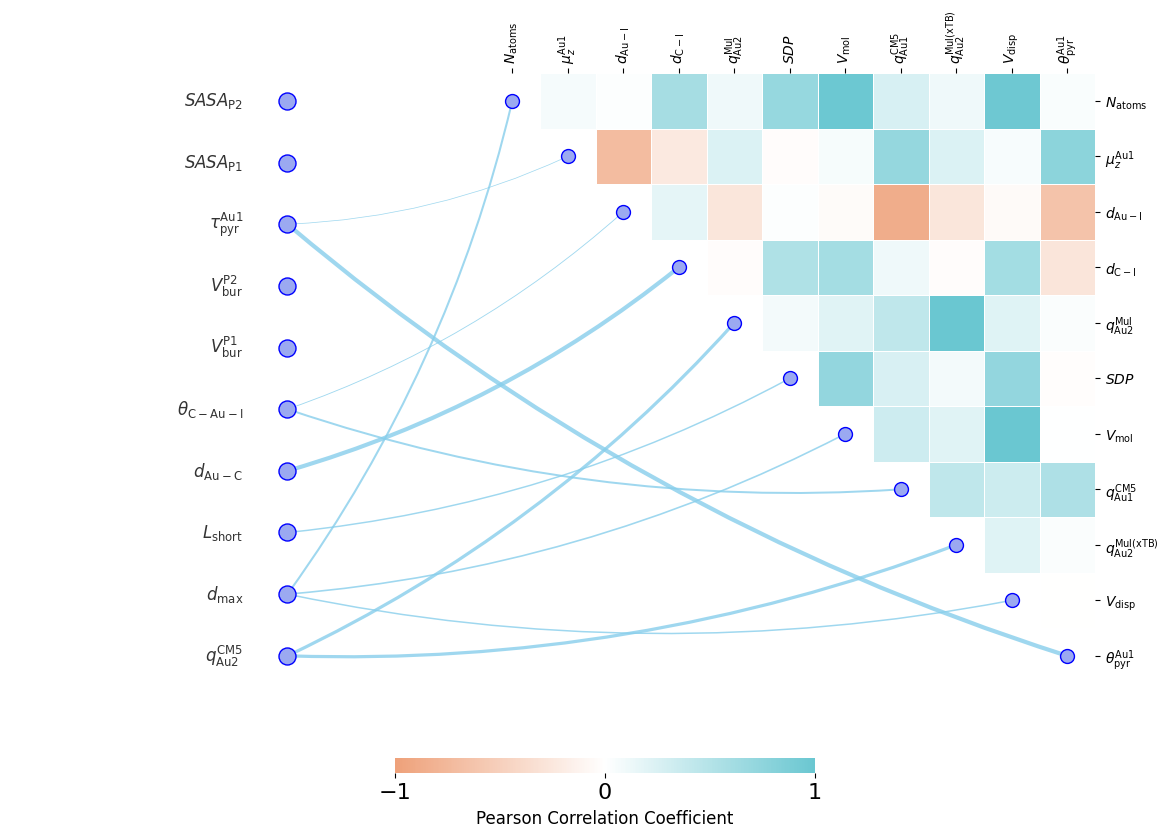

In [ ]:
import sys, os
import time
import pandas as pd
sys.path.append('')
from units.models import ModelTrainer
from units.unit import load_data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


y_type = 'ddG_kcal_mol'


local_descriptors = pd.read_csv('all_descriptor.csv',index_col='name')
local_descriptors = local_descriptors.drop(columns=['HOMO','HOMO_number', 'LUMO', 'HOMO_LUMO_Gap'])
combined_descriptors = pd.concat([local_descriptors], axis=1)

data = combined_descriptors
data_y = pd.read_csv('dG_ddG_PXP_cat_ts.csv', index_col=0)
data = data.loc[data_y.index]

y = data_y[y_type]

nan_columns = data.columns[data.isnull().any()].tolist()
constant_columns = data.columns[data.nunique() == 1].tolist()

columns_to_drop = list(set(nan_columns + constant_columns))
if columns_to_drop:

    print(f"⚠️ Warning: Found {len(columns_to_drop)} problematic feature columns that need to be removed.")

    if nan_columns:
        print(f"  - {len(nan_columns)} columns contain NaN values: {nan_columns}")
    if constant_columns:
        print(f"  - {len(constant_columns)} columns are constant: {constant_columns}")
    
    data = data.drop(columns=columns_to_drop)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



data_all = data.copy()
top_features =                [
            'c_CM5_Au2',
            'Farthest_Distance',
            'Mol_Size_Short',
            'Bond_Au_C',
            'Angle_C_Au_I',
            'bv_P_1',
            'bv_P_2',
            'pyr_p_Au_1',
            'sasa_P_1',
            'sasa_P_2'
                ]


correlation_matrix = data_all.corr().loc[top_features, :]


threshold = 0.8


mask = (correlation_matrix.abs() > threshold).any(axis=0)
filtered_corr = correlation_matrix.loc[:, mask]


filtered_corr = filtered_corr.sort_index(axis=1)

cols_to_show = [c for c in filtered_corr.columns if c not in top_features]


print(f" Number of features strongly correlated with Top 10: {filtered_corr.shape[1]}")

plt.figure(figsize=(32, 8))


sns.heatmap(filtered_corr, 
            annot=True,  
            fmt=".2f",   
            cmap="RdBu_r", 
            center=0,     
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title(f"Correlation between Target Features and Original High-Corr Features\n(Threshold > {threshold})", fontsize=15)
plt.ylabel("Model Top 10 Features", fontsize=12)
plt.xlabel("Correlated Original Features", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patches as patches
import matplotlib.lines as mlines
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

active_targets = cols_to_show

print(f"Start plotting: 10 source features -> {len(active_targets)} highly correlated target features")

target_corr_matrix = data[active_targets].corr()

links = []

for tgt in active_targets:
    for src in top_features:
        r_val = correlation_matrix.loc[src, tgt]
        
        if abs(r_val) > threshold:

            _, p_val = pearsonr(data[src], data[tgt])
            
            links.append({
                'source': src,
                'target': tgt,
                'r': r_val,
                'p': p_val
            })
link_df = pd.DataFrame(links)

def get_link_color(p):
    if p < 0.001: return "#87ceeb"
    if p < 0.05:  return '#A4C639'
    return '#D3D3D3'

def get_link_width(r):
    return 0.5 + (abs(r) - 0.8) * 15

fig_height = max(10, len(active_targets) * 0.4) 
fig, ax = plt.subplots(figsize=(14, fig_height))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

mask = np.tril(np.ones_like(target_corr_matrix, dtype=bool))

colors = ["#eea17a", "#FFFFFF", "#6ac7d1"]
nodes = [0, 0.5, 1]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("my_custom_cmap", list(zip(nodes, colors)))

sns.heatmap(
    target_corr_matrix,
    mask=mask,
    cmap=custom_cmap,
    center=0,
    vmax=1,
    vmin=-1,
    square=True,
    linewidths=0.5,
    cbar=False,
    ax=ax
)
new_xticklabels = [label_mapping.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
new_yticklabels = [label_mapping.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()]

ax.set_xticklabels(new_xticklabels, rotation=90, fontsize=10)
ax.set_yticklabels(new_yticklabels, rotation=0, fontsize=10)
ax.xaxis.tick_top()
plt.xticks(rotation=90, fontsize=10)
ax.yaxis.tick_right()
plt.yticks(rotation=0, fontsize=10)

n_targets = len(active_targets)

src_x = -3.0 - (n_targets * 0.05) 

src_y_coords = np.linspace(0.5, n_targets - 0.5, len(top_features))

src_pos = {name: (src_x, y) for name, y in zip(top_features[::-1], src_y_coords)}
tgt_pos = {name: (i + 0.5, i + 0.5) for i, name in enumerate(active_targets)}

for name, (x, y) in src_pos.items():
    ax.scatter(x, y, s=150, c="#9ba9f1", edgecolors='#0000ff', zorder=10)
    display_name = label_mapping.get(name, name)
    ax.text(x - 0.8, y, display_name, ha='right', va='center', fontsize=12, color='#333')

for _, row in link_df.iterrows():
    if row['target'] in tgt_pos:
        s_xy = src_pos[row['source']]
        t_xy = tgt_pos[row['target']]
        
        color = get_link_color(row['p'])
        lw = get_link_width(row['r'])
        alpha = 0.8 if row['p'] < 0.05 else 0.3

        curve = patches.FancyArrowPatch(
            posA=s_xy, posB=t_xy,
            arrowstyle='-',
            connectionstyle="arc3,rad=0.1", 
            color=color,
            linewidth=lw,
            alpha=alpha,
            mutation_scale=10,
            zorder=1
        )
        ax.add_patch(curve)
        
        if row['p'] < 0.05:
            ax.scatter(t_xy[0], t_xy[1], s=100, c="#9ba9f1", edgecolors='#0000ff', zorder=5)

ax.set_xlim(src_x - 5, n_targets)
ax.set_ylim(n_targets, 0)

sns.despine(left=True, bottom=True, right=True, top=True)
cbar_ax = fig.add_axes([0.4, 0.1, 0.3, 0.015])
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label("Pearson Correlation Coefficient", fontsize=12, labelpad=5)
cbar.set_ticks([-1, 0, 1])
cbar.ax.tick_params(labelsize=16)
cbar.outline.set_visible(False)

plt.show()